# Task: Sales Data Analysis using Python and Excel
### Task Description:
You are provided with an Excel file containing sales data for various products across different regions. Each row in the file includes the following information:

* Sale Date
* Product Name
* Region
* Number of Units Sold
* Price per Unit

### Your task is to:

1. Load the data from the Excel file using the pandas library.
2. Clean the data: remove rows with missing values, convert dates to the correct format, and calculate the total sales for each row.
3. Perform data analysis:
 * Find the top 5 best-selling products.
 * Identify the region with the highest sales.
 * Create a plot showing the sales trend by month.
4. Save the results into a new Excel file.

# Download Data:

[sales_data.xlsx](https://github.com/datasciencedojo/datasets/raw/master/sales_data.xlsx)

# Solution

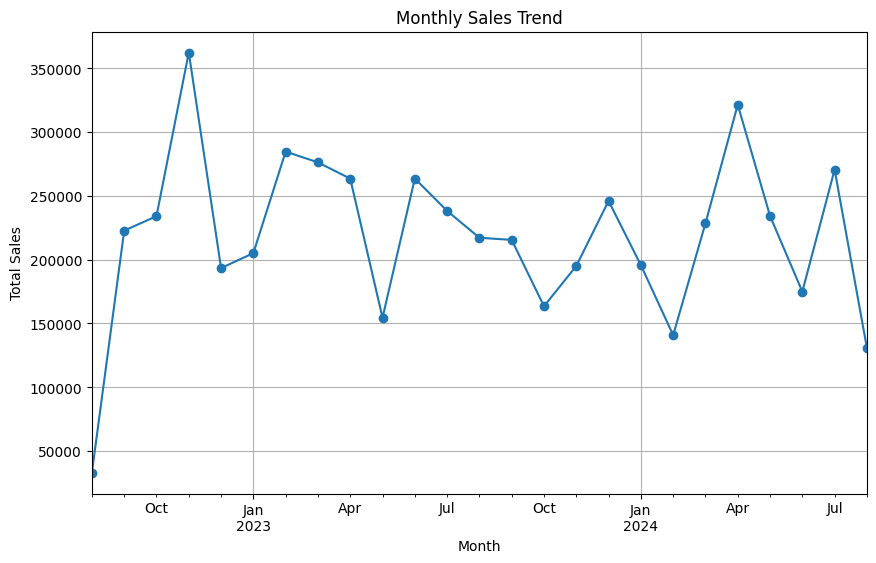

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel
df = pd.read_excel('sales_data.xlsx')

# Data cleaning
df.dropna(inplace=True)
df['Sale Date'] = pd.to_datetime(df['Sale Date'], format='%Y-%m-%d')
df['Total Sales'] = df['Number of Units Sold'] * df['Price per Unit']

# Top 5 best-selling products
top_products = df.groupby('Product Name')['Total Sales'].sum().nlargest(5)

# Region with the highest sales
region_sales = df.groupby('Region')['Total Sales'].sum()
top_region = region_sales.idxmax()
top_region_sales = region_sales.max()

# Sales trend by month
df['Month'] = df['Sale Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# Save results to a new Excel file
with pd.ExcelWriter('sales_analysis.xlsx') as writer:
    top_products.to_excel(writer, sheet_name='Top Products')
    pd.DataFrame({'Top Region': [top_region], 'Total Sales': [top_region_sales]}).to_excel(writer, sheet_name='Top Region', index=False)
    monthly_sales.to_excel(writer, sheet_name='Monthly Sales Trend')


# Conclusion:

This task is valuable for those looking to enhance their skills in working with Excel and Python, as well as to learn more about automating data analysis. It is based on real-world scenarios faced by data analysts.